In [1]:
!pip install tensorflow

  Using cached tensorflow-2.10.0-cp39-cp39-win_amd64.whl (455.9 MB)


In [2]:
import tensorflow as tf
print(tf.version)

<module 'tensorflow._api.v2.version' from 'C:\\Users\\marjan\\anaconda3\\lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>


In [5]:
!pip install pandas

In [7]:
!pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 124.0 kB/s eta 0:00:00
     ------------------------------------ 162.0/162.0 kB 421.5 kB/s eta 0:00:00
     -------------------------------------- 55.4/55.4 kB 579.1 kB/s eta 0:00:00
     ------------------------------------ 960.8/960.8 kB 440.9 kB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

In [18]:
path1 = r"C:\Users\marjan\Downloads\train.csv"
dftrain = pd.read_csv(path1)
path2 = r"C:\Users\marjan\Downloads\eval.csv"
dfeval = pd.read_csv(path2)
y_train = dftrain.pop("survived")
y_eval = dfeval.pop("survived")

In [19]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [20]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [8]:
dftrain.shape

(627, 9)

<AxesSubplot: >

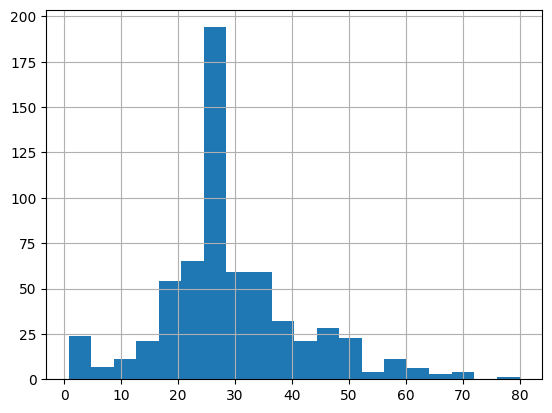

In [9]:
dftrain.age.hist(bins=20)

<AxesSubplot: >

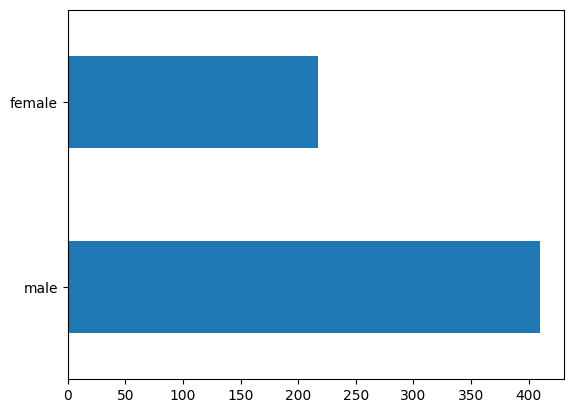

In [10]:
dftrain.sex.value_counts().plot(kind='barh')

<AxesSubplot: >

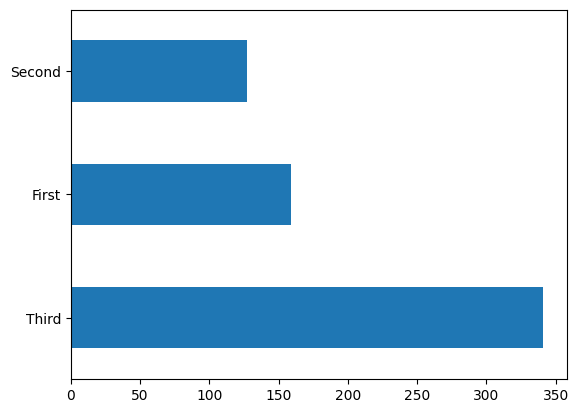

In [11]:
dftrain['class'].value_counts().plot(kind='barh')

Text(0.5, 0, '% anysurvive')

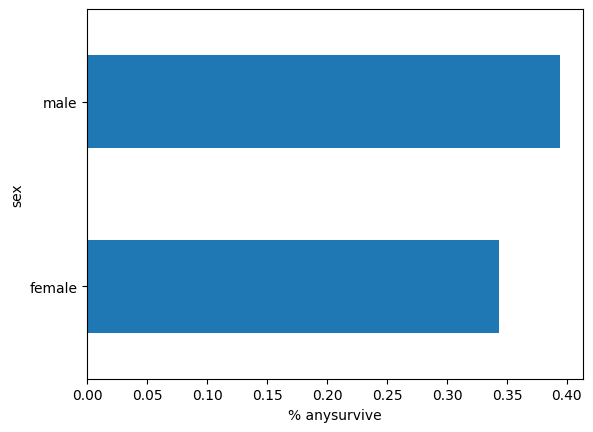

In [12]:
pd.concat([dftrain,y_train],axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% anysurvive')

In [16]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [21]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
    def input_function(): #this will be returned
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df),label_df)) # create tf.data.Dataset object with data and its label
        if shuffle:
            ds = ds.shuffle(1000) #randomize order of data
        ds = ds.batch(batch_size).repeat(num_epochs) #splits datasets into 32 batches and repeat process for number of epochs
        return ds #return a batch of the dataset
    return input_function

train_input_fn = make_input_fn(dftrain,y_train) # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1,shuffle=False)

In [23]:
#creating a model using a linear estimator
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\marjan\\AppData\\Local\\Temp\\tmpwhtnchwj', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [24]:
#Training the model
linear_est.train(train_input_fn) #train
result = linear_est.evaluate(eval_input_fn) #get model stats by testing on testing data
clear_output() #clear console
print(result['accuracy'])#result variable is simply a dict of our stats

0.74242425


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\marjan\AppData\Local\Temp\tmpwhtnchwj\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


<AxesSubplot: title={'center': 'predicted probabilities'}, ylabel='Frequency'>

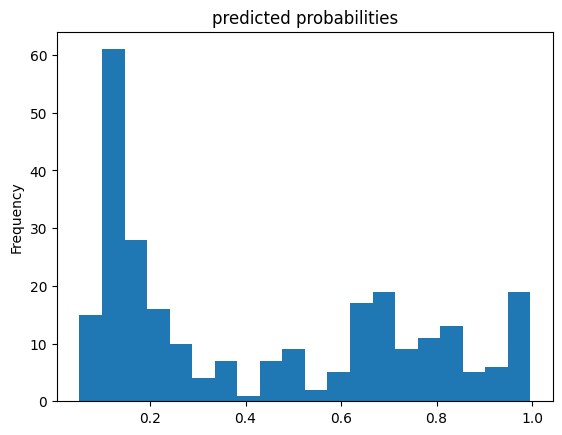

In [26]:
pred_dicts = list(linear_est.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])
probs.plot(kind='hist', bins = 20, title= 'predicted probabilities')